# Analisis Sentimen Aplikasi Jamsostek Mobile

## Latar Belakang

Jamsostek Mobile adalah aplikasi yang digunakan untuk memudahkan peserta Jamsostek dalam mengakses informasi BPJS. Aplikasi ini memiliki beberapa fitur, seperti cek saldo, cek iuran, klaim JHT, dan lain-lain. Dengan adanya aplikasi ini, peserta Jamsostek tidak perlu lagi datang ke kantor untuk mengecek informasi terkait program Jamsostek. Namun, tentu saja, aplikasi ini juga memiliki kekurangan dan kelebihan. Oleh karena itu, kita akan melakukan analisis sentimen terhadap aplikasi Jamsostek Mobile.

## Tujuan

Tujuan dari analisis ini adalah untuk mengetahui sentimen pengguna terhadap aplikasi Jamsostek Mobile. Dengan mengetahui sentimen pengguna, kita dapat mengetahui kelebihan dan kekurangan dari aplikasi ini. Dengan demikian, kita dapat menjadikan analisis ini sebagai bahan masukan untuk meningkatkan kualitas aplikasi Jamsostek Mobile atau aplikasi serupa di masa depan.

## Data

Data yang digunakan dalam analisis ini adalah data review aplikasi [Jamsostek Mobile (JMO)](https://play.google.com/store/apps/details?id=com.bpjstku) yang diambil dari Google Play Store. Data ini berisi review pengguna beserta rating yang diberikan oleh pengguna. Data ini diambil pada tanggal 17 Februari 2025 dengan total 108.000 review. Namun, agar dataset dataset seimbang, kita akan menggunakan teknik undersampling dengan library `imbalanced-learn` untuk membagi data berdasarkan jumlah minimum dari 3 kategori sentiment, yaitu positif, netral, dan negatif.

## Kualitas Data

Data yang digunakan dalam analisis ini adalah data review aplikasi Jamsostek Mobile yang diambil dari Google Play Store. Data ini memiliki 4 kolom, yaitu:
- `id`: ID review
- `content`: Isi review
- `score`: Rating yang diberikan oleh pengguna (1-5)
- `date`: Tanggal review
Dataset ini masih belum bersih, sehingga kita perlu mengolah data terlebih dahulu dengan melakukan beberapa tahapan, seperti menghapus baris data yang kosong, menghapus data duplikat, labeling dan lain-lain.

## Metode Labeling

Metode labelling yang digunakan dalam proyek analisis sentimen ini adalah dengan menggunakan lexicon-based. Lexicon-based adalah metode yang menggunakan kamus kata-kata yang sudah diberi label sentimen (positif, netral, negatif). Di mana sentimen teks ditentukan dengan mencocokkan kata-kata dalam teks dengan dua kamus lexicon (positif dan negatif) yang sudah memiliki skor sentimen. Skor sentimen dihitung dengan menjumlahkan nilai dari kata-kata yang ada di teks berdasarkan kamus tersebut. Sentimen akhir dikategorikan sebagai POSITIF, NEGATIF, atau NETRAL berdasarkan skor yang dihasilkan, dengan threshold < -5 untuk negatif, > 5 untuk positif, dan sisanya netral.

## Author

- Nama : Krisna Santosa
- Dicoding Profile : [Krisna Santosa](https://www.dicoding.com/users/krisna_santosa)

## Preparation

Tahapan pertama yang dilakukan adalah preparation di mana dalam tahapan ini kita akan melakukan instalasi library yang dibutuhkan seperti nltk sastrawi dan lainnya serta melakukan import library yang akan digunakan seperti pandas, numpy, dan matplotlib.

In [1]:
!pip install sastrawi emoji nltk wordcloud imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 28.5 MB/s eta 0:00:00


In [ ]:
import re
import csv
import nltk
import emoji
import requests
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from imblearn.under_sampling import RandomUnderSampler
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
import matplotlib.pyplot as plt

Selanjutnya kita akan mendownload stopwords, punkt, dan punkt_tab menggunakan library nltk.

In [3]:
# Download stopwords and punkt
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
DATASET_NAME = '/content/drive/MyDrive/Data Science/ulasan_aplikasi_bpjs_mobile_100K.csv'
SLANGWORDS_DATASET = '/content/drive/MyDrive/Data Science/indonesian_slangwords.csv'

In [ ]:
df = pd.read_csv(DATASET_NAME)
df.head()

,id,content,score,date
0,f0c8161b-3014-4d04-9e71-aa78520b5899,Kenapa aplikasinya sering error? Kemarin² ga b...,1,2025-01-22 19:02:07
1,00cd22a2-b8b1-424b-a0c0-090aa3d136ee,"Aplikasi JMO (Jamsostek ketenagakerjaan ini, s...",5,2025-02-01 10:00:59
2,493aade3-c29d-4a44-8454-c74a66643993,"Dulu aplikasi ini bagus, tapi kenapa mau cek s...",2,2025-01-05 18:10:29
3,a9cba0b7-17f4-42f0-b80b-b0f9cdc8c17b,saat melakukan pengkinan data malah ke refresh...,1,2025-01-13 14:30:42
4,9d20718e-a57b-42b3-82f9-792b3206a1ed,"Katanya aplikasi intansi pemerintah, tapi laya...",1,2025-01-30 11:12:14


In [ ]:
# show basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       108000 non-null  object
 1   content  108000 non-null  object
 2   score    108000 non-null  int64 
 3   date     108000 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [ ]:
# Show statistical data
df.describe()

,score
count,108000.000000
mean,2.763676
std,1.796031
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,5.000000


Dari 108.000 review, kita akan mengetahui bahwa rata-rata rating yang diberikan oleh pengguna adalah 2.7 yang berarti mayoritas pengguna memberikan rating yang rendah terhadap aplikasi Jamsostek Mobile. Hal ini menunjukkan bahwa aplikasi ini memiliki kekurangan yang perlu diperbaiki.

In [ ]:
# show missing values
df.isnull().sum()

,0
id,0
content,0
score,0
date,0


In [ ]:
# show duplicated data
df.duplicated().sum()

0

Berdasarkan hasil eksplorasi data, kita tidak menemukan data duplikat dan data kosong. Oleh karena itu, kita dapat melanjutkan ke tahapan berikutnya yaitu preprocessing data.

## Pre-processing Text

Dalam tahaan ini kita akan melakukan beberapa tahapan preprocessing data yaitu mengubah teks menjadi huruf kecil, menghapus karakter khusus, menghapus angka, menghapus stopwords, mengubah kata kata slang menjadi formal dan lain-lain.

Pastikan dataset bersih dengan tidak adanya data duplikat dan data kosong.

In [ ]:
# delete missing values
df = df.dropna()

# delete duplicated data
df = df.drop_duplicates()

Fungsi-fungsi yang digunakan dalam preprocessing data adalah:
- `lowercase_text`: Mengubah teks menjadi huruf kecil
- `handle_emojis`: Mengubah emoji menjadi teks biasa
- `remove_noise`: Menghapus karakter khusus, angka, dan spasi berlebih
- `remove_stopwords`: Menghapus stopwords
- `fix_slangwords`: Mengubah kata-kata slang menjadi formal
- `stemming`: Melakukan stemming pada kata-kata
- `tokenize_text`: Melakukan tokenisasi pada teks
- `to_sentence`: Menggabungkan token menjadi kalimat

Namun, dalam proyek ini kita tidak melakukan stemming karena stemming dalam dataset ini memberikan hasil yang kurang baik dikarenakan banyak kata yang tidak dikenali oleh library sastrawi. Tidak hanya itu, dataset ini memiliki kata-kata yang tidak baku sehingga stemming tidak dapat dilakukan.

In [48]:
def lowercase_text(text):
    return text.lower()

def handle_emojis(text):
    return emoji.demojize(text, language='id')

def remove_noise(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Menghapus mention
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)  # Menghapus hashtag
    text = re.sub(r'RT[\s]', '', text)  # Menghapus RT
    text = re.sub(r'http\S+', '', text)  # Menghapus link
    text = re.sub(r'[0-9]+', '', text)  # Menghapus angka
    text = re.sub(r'[^\w\s]', ' ', text)  # Ganti karakter khusus dengan spasi
    text = re.sub(r'\s+', ' ', text)  # Menghapus spasi berlebih
    return text.strip()

def tokenize_text(text):
    return word_tokenize(text)

def remove_stopwords(tokens):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in tokens:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemming_text(tokens):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return [stemmer.stem(word) for word in tokens]

def to_sentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

Dataset slangwords yang digunakan dalam proyek ini adalah dataset yang diambil dari github dengan username [khikisb](https://gist.github.com/khikisb/79313224591f8fc80f8f40eec71755fd) yang menyediakan dataset slangwords yang berisi kata-kata slang dan kata-kata formalnya.

In [51]:
# Load slang dataset
slang_df = pd.read_csv(SLANGWORDS_DATASET)
slangwords = dict(zip(slang_df['slang'], slang_df['formal']))

In [ ]:
# Preprocessing
df['text_lowercase'] = df['content'].apply(lowercase_text)

df['text_slangwords'] = df['text_lowercase'].apply(fix_slangwords)

df['text_emoji_clean'] = df['text_slangwords'].apply(handle_emojis)

df['text_clean'] = df['text_emoji_clean'].apply(remove_noise)

df['text_tokenize'] = df['text_clean'].apply(tokenize_text)

df['text_stopword'] = df['text_tokenize'].apply(remove_stopwords)

df['final_text'] = df['text_stopword'].apply(to_sentence)

In [ ]:
df.head()

,id,content,score,date,text_lowercase,text_slangwords,text_emoji_clean,text_clean,text_tokenize,text_stopword,final_text
0,f0c8161b-3014-4d04-9e71-aa78520b5899,Kenapa aplikasinya sering error? Kemarin² ga b...,1,2025-01-22 19:02:07,kenapa aplikasinya sering error? kemarin² ga b...,kenapa aplikasinya sering error? kemarin² tida...,kenapa aplikasinya sering error? kemarin² tida...,kenapa aplikasinya sering error kemarin² tidak...,"[kenapa, aplikasinya, sering, error, kemarin²,...","[aplikasinya, error, kemarin², login, sekaliny...",aplikasinya error kemarin² login sekalinya mas...
1,00cd22a2-b8b1-424b-a0c0-090aa3d136ee,"Aplikasi JMO (Jamsostek ketenagakerjaan ini, s...",5,2025-02-01 10:00:59,"aplikasi jmo (jamsostek ketenagakerjaan ini, s...","aplikasi jmo (jamsostek ketenagakerjaan ini, s...","aplikasi jmo (jamsostek ketenagakerjaan ini, s...",aplikasi jmo jamsostek ketenagakerjaan ini seb...,"[aplikasi, jmo, jamsostek, ketenagakerjaan, in...","[aplikasi, jmo, jamsostek, ketenagakerjaan, ha...",aplikasi jmo jamsostek ketenagakerjaan harapka...
2,493aade3-c29d-4a44-8454-c74a66643993,"Dulu aplikasi ini bagus, tapi kenapa mau cek s...",2,2025-01-05 18:10:29,"dulu aplikasi ini bagus, tapi kenapa mau cek s...","dulu aplikasi ini bagus, tapi kenapa mau cek s...","dulu aplikasi ini bagus, tapi kenapa mau cek s...",dulu aplikasi ini bagus tapi kenapa mau cek sa...,"[dulu, aplikasi, ini, bagus, tapi, kenapa, mau...","[aplikasi, bagus, cek, saldo, terbaru, nomor, ...",aplikasi bagus cek saldo terbaru nomor tambahk...
3,a9cba0b7-17f4-42f0-b80b-b0f9cdc8c17b,saat melakukan pengkinan data malah ke refresh...,1,2025-01-13 14:30:42,saat melakukan pengkinan data malah ke refresh...,saat melakukan pengkinan data malah ke refresh...,saat melakukan pengkinan data malah ke refresh...,saat melakukan pengkinan data malah ke refresh...,"[saat, melakukan, pengkinan, data, malah, ke, ...","[pengkinan, data, refresh, pengkinian, data, u...",pengkinan data refresh pengkinian data ulang p...
4,9d20718e-a57b-42b3-82f9-792b3206a1ed,"Katanya aplikasi intansi pemerintah, tapi laya...",1,2025-01-30 11:12:14,"katanya aplikasi intansi pemerintah, tapi laya...","katanya aplikasi intansi pemerintah, tapi laya...","katanya aplikasi intansi pemerintah, tapi laya...",katanya aplikasi intansi pemerintah tapi layan...,"[katanya, aplikasi, intansi, pemerintah, tapi,...","[aplikasi, intansi, pemerintah, layanannya, je...",aplikasi intansi pemerintah layanannya jelek s...


Setelah melakukan preprocessing data, kita akan melakukan labelling data dengan menggunakan lexicon-based. Namun, saat ini dataset memiliki beberapa baris yang tidak memiliki final_text setelah dilakukan preprocessing data. Hal ini disebabkan karena teks yang ada di dataset tersebut hanya berisi karakter khusus, angka, atau stopwords. Oleh karena itu, kita perlu menghapus baris data tersebut.

In [ ]:
print(df[(df['final_text'] == '') | (df['final_text'] == ' ')])


                                          id  \
16126   0970f371-f369-412d-9509-9e87054a1494   
16323   3dd57706-d6fc-4c61-9c90-afc1e849d9f1   
17330   97f5a55f-135e-44df-ac74-405b1ab0368d   
17567   2e47786d-fef2-494c-b491-57b1988023c6   
17613   04a0fba7-322a-4c47-963d-77e9caab370b   
...                                      ...   
105549  c3789684-b49f-4f2f-ad13-ba6a01ec2fbb   
106679  618a0278-af74-45b5-93a4-895c76f86da3   
107069  1a8ac76f-ef04-431e-9edd-3ef4fd9cf4b2   
107327  aad603ed-509a-48a6-8611-cab468fe89d6   
107656  faa210ba-24cb-4a14-bd86-2b2f2cc61404   

                                            content  score  \
16126                         cukup baik di gunakan      5   
16323        sekarang udah lebih baik dr sebelumnya      5   
17330                    sangat sangat luar biasa..      5   
17567                  sudah bisa di gunakan lagi..      4   
17613                        selalu jadi lebih baik      4   
...                                             ...

In [ ]:
# delete missing values
df = df[df['final_text'].str.strip() != '']

In [ ]:
print(df[(df['final_text'] == '') | (df['final_text'] == ' ')])


Empty DataFrame
Columns: [id, content, score, date, text_lowercase, text_slangwords, text_emoji_clean, text_clean, text_tokenize, text_stopword, final_text]
Index: []


In [ ]:
df.to_csv('/content/drive/MyDrive/Data Science/ulasan_aplikasi_bpjs_mobile_100K_preprocessed.csv', index=False)

## Labeling

Setelah melakukan preprocessing data, kita akan melakukan labelling data dengan menggunakan lexicon-based. Labelling data ini dilakukan dengan menggunakan kamus kata positif dan negatif yang sudah diberi label sentimen. Kita akan memberikan threshold < -5 untuk negatif, > 5 untuk positif, dan sisanya netral.

In [ ]:
def load_lexicon():
    """
    Load positive and negative lexicons from GitHub
    Returns:
    tuple: (positive_lexicon_dict, negative_lexicon_dict)
    """
    lexicon_positive = dict()
    lexicon_negative = dict()

    # Load positive lexicon
    response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
    if response.status_code == 200:
        reader = csv.reader(StringIO(response.text), delimiter=',')
        for row in reader:
            lexicon_positive[row[0]] = int(row[1])
    else:
        print("Failed to fetch positive lexicon data")

    # Load negative lexicon
    response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
    if response.status_code == 200:
        reader = csv.reader(StringIO(response.text), delimiter=',')
        for row in reader:
            lexicon_negative[row[0]] = int(row[1])
    else:
        print("Failed to fetch negative lexicon data")

    return lexicon_positive, lexicon_negative

def calculate_lexicon_score(tokens, lexicon_positive, lexicon_negative):
    """
    Calculate sentiment score based on lexicon using tokenized text
    """
    score = 0

    for word in tokens:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        if word in lexicon_negative:
            score += lexicon_negative[word]

    return score

def labeling(score, lexicon_score):
    """
    Determine final sentiment using lexicon score with desired threshold
    """
    score = int(float(score))

    if lexicon_score > 5:
        return 'POSITIVE'
    elif lexicon_score < -5:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

def analyze_sentiment(df):
    """
    Analyze sentiment for the entire dataset
    """
    # Load lexicons
    lexicon_positive, lexicon_negative = load_lexicon()

    # Calculate lexicon scores using the tokenized text
    df['lexicon_score'] = df['text_stopword'].apply(
        lambda x: calculate_lexicon_score(x, lexicon_positive, lexicon_negative)
    )

    # Determine final sentiment
    df['sentiment'] = df.apply(
        lambda row: labeling(row['score'], row['lexicon_score']),
        axis=1
    )

    return df


In [ ]:
# Analyze sentiment
df = analyze_sentiment(df)

# Print results
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())
print("\nSample Results:")
print(df[['final_text', 'score', 'lexicon_score', 'sentiment']].head())


Sentiment Distribution:
sentiment
NEUTRAL     70122
NEGATIVE    29711
POSITIVE     8070
Name: count, dtype: int64

Sample Results:
                                          final_text  score  lexicon_score  \
0  aplikasinya error kemarin² login sekalinya mas...      1            -13   
1  aplikasi jmo jamsostek ketenagakerjaan harapka...      5             -4   
2  aplikasi bagus cek saldo terbaru nomor tambahk...      2            -18   
3  pengkinan data refresh pengkinian data ulang p...      1            -11   
4  aplikasi intansi pemerintah layanannya jelek s...      1            -10   

  sentiment  
0  NEGATIVE  
1   NEUTRAL  
2  NEGATIVE  
3  NEGATIVE  
4  NEGATIVE  


Berdasarkan hasil labelling data, kita mendapatkan bahwa mayoritas review aplikasi Jamsostek Mobile adalah netral sekitar 70.000 baris dan dengan kelas minoritas yaitu positif sekitar 8.000 baris data.

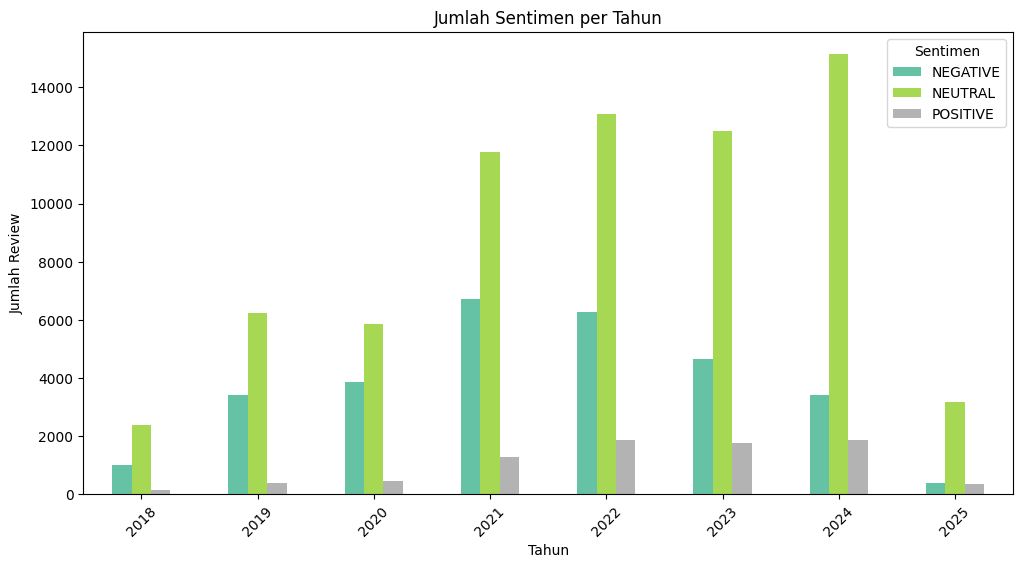

In [ ]:
# Show sentiment every year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

sentiment_per_year = df.groupby(['year', 'sentiment']).size().unstack().fillna(0)
sentiment_per_year.plot(kind='bar', stacked=False, figsize=(12,6), colormap='Set2')
plt.title('Jumlah Sentimen per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Review')
plt.legend(title='Sentimen')
plt.xticks(rotation=45)
plt.show()

Berdasarkan hasil grafik di atas, kita dapat melihat bahwa seiring dengan bertambahnya tahun, jumlah review positif dan negatif meningkat. Review negatif yang paling banyak terjadi pada tahun 2021, sedangkan review positif yang paling banyak terjadi pada tahun 2022.

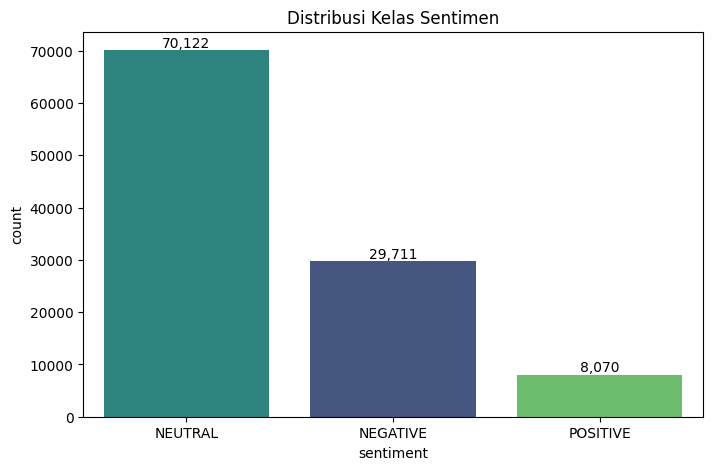

In [ ]:
# Plot Class Distribution
plt.figure(figsize=(8,5))
ax = sns.countplot(x=df['sentiment'], palette='viridis', order=df['sentiment'].value_counts().index, hue=df['sentiment'])
for container in ax.containers:
        ax.bar_label(container, label_type='edge', labels=[f'{int(v.get_height()):,}' for v in container])
plt.title('Distribusi Kelas Sentimen')
plt.show()

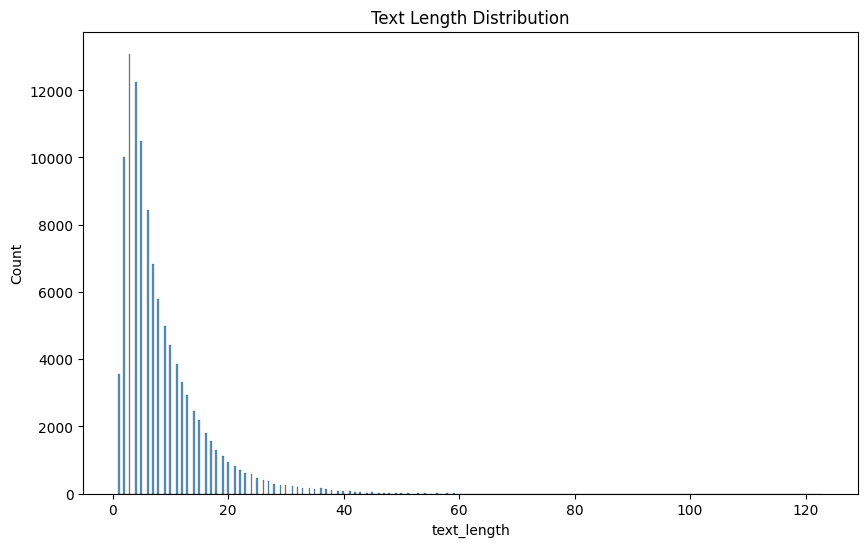

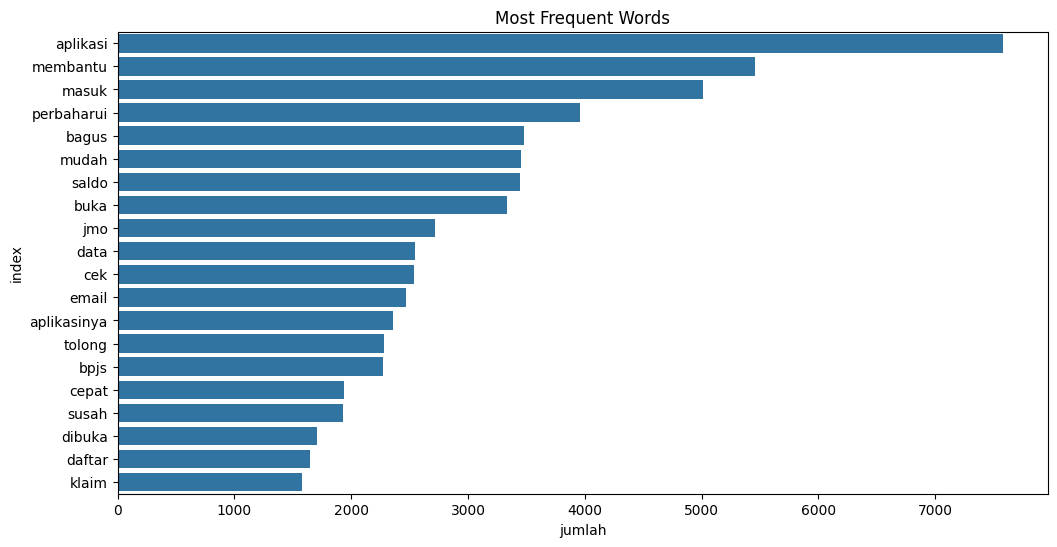

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
df['text_length'] = df['final_text'].apply(lambda x: len(x.split()))
sns.histplot(df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['final_text'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

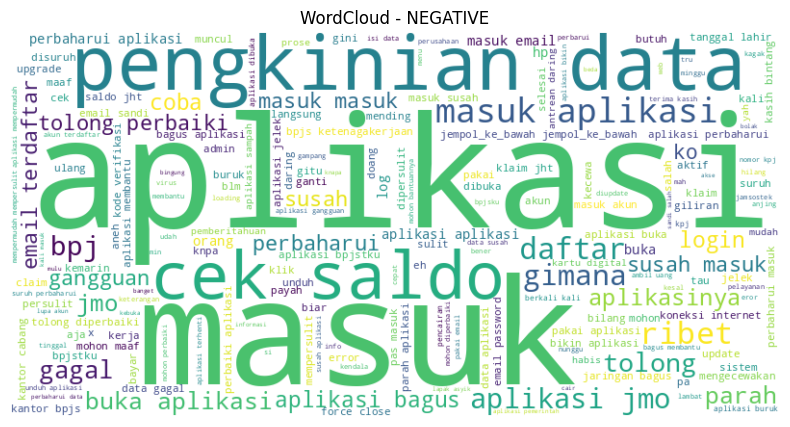

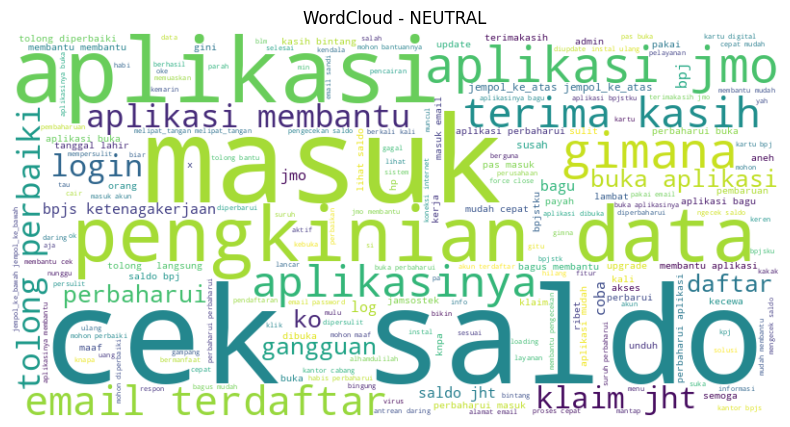

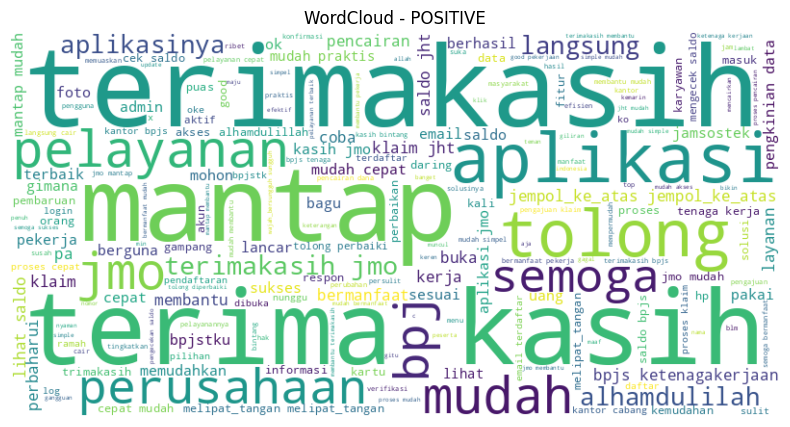

In [ ]:
# Wordcloud for all sentiment
for sentiment in df['sentiment'].unique():
    text = ' '.join(df[df['sentiment'] == sentiment]['final_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud - {sentiment}')
    plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/Data Science/ulasan_aplikasi_bpjs_mobile_100K_labeled.csv', index=False)

## Balancing Dataset

 Dikarenakan dataset ini tidak seimbang, kita akan menggunakan teknik undersampling untuk membagi data berdasarkan jumlah minimum dari 3 kategori sentiment, yaitu positif, netral, dan negatif. Sehingga hasil dari undersampling data adalah 8.070 x 3 = 24.210 baris data.

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/ulasan_aplikasi_bpjs_mobile_100K_labeled.csv')

In [7]:
# Balancing (undersampling)
TARGET_SAMPLE_SIZE = min(df['sentiment'].value_counts())
rus = RandomUnderSampler(sampling_strategy={'POSITIVE': TARGET_SAMPLE_SIZE, 'NEGATIVE': TARGET_SAMPLE_SIZE, 'NEUTRAL': TARGET_SAMPLE_SIZE}, random_state=42)
df_balanced, _ = rus.fit_resample(df, df['sentiment'])

In [8]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24210 entries, 17680 to 99057
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                24210 non-null  object
 1   content           24210 non-null  object
 2   score             24210 non-null  int64 
 3   date              24210 non-null  object
 4   text_lowercase    24210 non-null  object
 5   text_slangwords   24210 non-null  object
 6   text_emoji_clean  24210 non-null  object
 7   text_clean        24210 non-null  object
 8   text_tokenize     24210 non-null  object
 9   text_stopword     24210 non-null  object
 10  final_text        24210 non-null  object
 11  lexicon_score     24210 non-null  int64 
 12  sentiment         24210 non-null  object
 13  year              24210 non-null  int64 
 14  text_length       24210 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 3.0+ MB


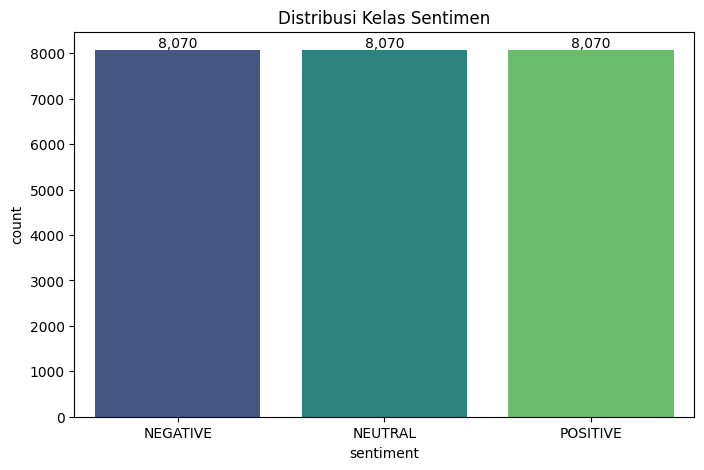

In [ ]:
# Plot Class Distribution
plt.figure(figsize=(8,5))
ax = sns.countplot(x=df_balanced['sentiment'], palette='viridis', order=df_balanced['sentiment'].value_counts().index, hue=df_balanced['sentiment'])
for container in ax.containers:
        ax.bar_label(container, label_type='edge', labels=[f'{int(v.get_height()):,}' for v in container])
plt.title('Distribusi Kelas Sentimen')
plt.show()

## Modeling

Setelah melakukan balancing dataset, kita akan melakukan modeling dengan menggunakan kombinasi ekstraksi fitur dan algoritma klasifikasi. Ekstraksi fitur yang digunakan adalah TF-IDF dan Bag of Words serta algoritma klasifikasi yang digunakan adalah Logistic Regression, SVM, dan Deep Learning. Setelah model dilatih, kita akan melakukan inference pada data test untuk menilai performa dari model yang telah dibuat.

In [32]:
X = df_balanced['final_text']
y = df_balanced['sentiment']

## Machine Learning

### TF-IDF Logistic Regression - 70:30 Split Data

Model Pertama yang digunakan adalah TF-IDF Logistic Regression dengan data yang sudah di split 70:30. Model ini menghasilkan akurasi sebesar 0.89 pada training data dan 0.85 pada testing data. Hasil ini menunjukkan bahwa model ini memiliki performa yang cukup baik, namun masih ada overfitting pada training data.

In [33]:
tfidf = TfidfVectorizer(max_features=5000, min_df=20, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42) # 30% test, 70% training

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

logistic_regression.fit(X_train.toarray(), y_train)
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.8900100312739718
Logistic Regression - accuracy_test: 0.8594244802423241


In [ ]:
# Inference TF-IDF Logistic Regression
new_text = df['final_text'].sample(1).values[0]
new_text_tfidf = tfidf.transform([new_text])

# Make prediction
predicted_sentiment = logistic_regression.predict(new_text_tfidf.toarray())

print(f"Text: {new_text}")
print(f"Predicted sentiment for the new text: {predicted_sentiment[0]}")


Text: coba fitur pencairan aplikasi jmo verifikasi biometric ditolak terusan fotonya maksimalnya kali mohon diperbaiki aplikasinya spy memudahkan ekspektasi mencairkan saldo jht kekantor terpenuhi mengecewakan
Predicted sentiment for the new text: NEGATIVE


### TF-IDF SVM - 90:10 Split Data

Model kedua yang digunakan adalah TF-IDF SVM dengan data yang sudah di split 90:10. Model ini menghasilkan akurasi sedikit lebih baik dibandingkan model sebelumnya, yaitu sebesar 0.90 pada training data dan 0.86 pada testing data.

In [35]:
tfidf = TfidfVectorizer(max_features=5000, min_df=20, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.1, random_state=42) # 10% test, 90% training

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train)
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

print('SVM - accuracy_train:', accuracy_train_svm)
print('SVM - accuracy_test:', accuracy_test_svm)

SVM - accuracy_train: 0.9012804626187526
SVM - accuracy_test: 0.8690623709211069


In [40]:
# Inference TF-IDF SVM
new_text = df['final_text'].sample(1).values[0]
new_text_tfidf = tfidf.transform([new_text])

# Make prediction
predicted_sentiment = svm_model.predict(new_text_tfidf.toarray())

print(f"Text: {new_text}")
print(f"Predicted sentiment for the new text: {predicted_sentiment[0]}")


Text: membantu pengajuan klaim langsung cair hitungan menit persyaratan terpenuhin terimakasih jmo
Predicted sentiment for the new text: POSITIVE


## Deep Learning

### TF-IDF Dense Model

Model ketiga yang digunakan adalah TF-IDF Dense Model. Model ini menghasilkan akurasi sebesar 0.91 pada training data dan 0.86 pada testing data. Hasil ini mirip dengan model SVM, namun model ini lebih cepat dalam proses training.

In [41]:
# Prepare data
label_to_idx = {label: idx for idx, label in enumerate(np.unique(y))}
y_encoded = np.array([label_to_idx[label] for label in y])
y_categorical = to_categorical(y_encoded)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42) # 80% Training, 20% Test

In [42]:
# TF-IDF Feature Extraction
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

tfidf_model = Sequential([
    Dense(16, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_tfidf.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

tfidf_model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5, verbose=1)

tfidf_history = tfidf_model.fit(
    X_train_tfidf, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
485/485 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5578 - loss: 0.8903 - val_accuracy: 0.8219 - val_loss: 0.6733 - learning_rate: 5.0000e-04
Epoch 2/10
485/485 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8200 - loss: 0.4615 - val_accuracy: 0.8487 - val_loss: 0.3952 - learning_rate: 5.0000e-04
Epoch 3/10
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8617 - loss: 0.3745 - val_accuracy: 0.8513 - val_loss: 0.3700 - learning_rate: 5.0000e-04
Epoch 4/10
485/485 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8812 - loss: 0.3369 - val_accuracy: 0.8606 - val_loss: 0.3584 - learning_rate: 5.0000e-04
Epoch 5/10
485/485 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8989 - loss: 0.3022 - val_accuracy: 0.8598 - val_loss: 0.3609 - learning_rate: 5.0000e-04
Epoch 6/10
480/485 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9064 - loss: 0.2861
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.90

In [ ]:
# Inference with TF-IDF Dense Model
new_text = [df['final_text'].sample(1).values[0]]
new_text_tfidf = tfidf.transform(new_text).toarray()

# Make predictions
predictions = tfidf_model.predict(new_text_tfidf)
predicted_classes = np.argmax(predictions, axis=1)

idx_to_label = {idx: label for label, idx in label_to_idx.items()}
predicted_labels = [idx_to_label[idx] for idx in predicted_classes]

print(f"Text: {new_text}")
print(f"Predicted labels for new text: {predicted_labels}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Text: ['mohon solusi masuk aplikasi email terdaftar masuk google chrome mohon bimbingannya']
Predicted labels for new text: ['NEUTRAL']


### Bag of Words Dense Model (BEST MODEL)

Model keempat yang digunakan adalah Bag of Words Dense Model. Model ini menggunakan Bag of Words sebagai ekstraksi fitur dan Dense Layer sebagai algoritma klasifikasi. Model ini menghasilkan akurasi yang paling baik dibandingkan model sebelumnya, yaitu sebesar 0.96 pada training data dan 0.92 pada testing data.

In [44]:
# BoW Feature Extraction
bow = CountVectorizer(max_features=10000)
X_train_bow = bow.fit_transform(X_train).toarray()
X_test_bow = bow.transform(X_test).toarray()

# Create Dense Model for BoW
bow_model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_bow.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile and Train BoW Model
bow_model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
bow_history = bow_model.fit(
    X_train_bow, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
485/485 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5732 - loss: 0.8994 - val_accuracy: 0.8743 - val_loss: 0.3482
Epoch 2/10
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8572 - loss: 0.3666 - val_accuracy: 0.9140 - val_loss: 0.2460
Epoch 3/10
485/485 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9128 - loss: 0.2422 - val_accuracy: 0.9112 - val_loss: 0.2275
Epoch 4/10
485/485 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9375 - loss: 0.1837 - val_accuracy: 0.9220 - val_loss: 0.2224
Epoch 5/10
485/485 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9504 - loss: 0.1497 - val_accuracy: 0.9220 - val_loss: 0.2267
Epoch 6/10
485/485 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9648 - loss: 0.1105 - val_accuracy: 0.9215 - val_loss: 0.2442
Epoch 7/10
485/485 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9691 - loss: 0.0926 - val_accuracy: 0.9290 - val_loss: 0.2421


In [ ]:
# Inference with BoW Dense Model
new_text = [df['final_text'].sample(1).values[0]]
new_text_bow = bow.transform(new_text).toarray()

# Make predictions
predictions = bow_model.predict(new_text_bow)
predicted_classes = np.argmax(predictions, axis=1)

idx_to_label = {idx: label for label, idx in label_to_idx.items()}
predicted_labels = [idx_to_label[idx] for idx in predicted_classes]

print(f"Text: {new_text}")
print(f"Predicted labels for new text: {predicted_labels}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Text: ['aplikasi buruk pengkinian data gagal foto ditempat terang gagal']
Predicted labels for new text: ['NEGATIVE']


## Evaluation

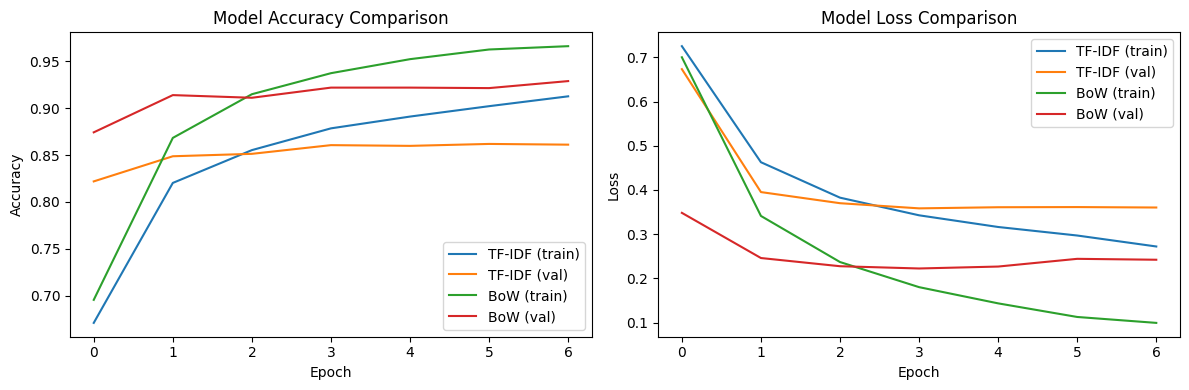

In [46]:
# History Comparison
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(tfidf_history.history['accuracy'], label='TF-IDF (train)')
plt.plot(tfidf_history.history['val_accuracy'], label='TF-IDF (val)')
plt.plot(bow_history.history['accuracy'], label='BoW (train)')
plt.plot(bow_history.history['val_accuracy'], label='BoW (val)')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(tfidf_history.history['loss'], label='TF-IDF (train)')
plt.plot(tfidf_history.history['val_loss'], label='TF-IDF (val)')
plt.plot(bow_history.history['loss'], label='BoW (train)')
plt.plot(bow_history.history['val_loss'], label='BoW (val)')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Berdasarkan hasil evaluasi, model terbaik yang digunakan adalah Bag of Words Dense Model dengan akurasi sebesar 0.96 pada training data dan 0.92 pada testing data. Model ini memiliki performa yang paling baik dibandingkan model lainnya. Hal ini menunjukkan bahwa model ini mampu mengklasifikasikan sentimen review aplikasi Jamsostek Mobile dengan baik.

## Inference with Best Model

Setelah mendapatkan model terbaik, kita akan melakukan inference pada data yang belum pernah dilihat oleh model. Data ini berisi review aplikasi Jamsostek Mobile yang belum dilabeli sentimen. Dengan menggunakan model terbaik, kita dapat mengklasifikasikan sentimen dari review-review tersebut.

In [ ]:
new_text = input("Enter New Text: ")

# Preprocessing
new_text_lower = lowercase_text(new_text)
new_text_slangfixed = fix_slangwords(new_text_lower)
new_text_emoji_clean = handle_emojis(new_text_slangfixed)
new_text_clean = remove_noise(new_text_emoji_clean)
new_text_tokenized = tokenize_text(new_text_clean)
new_text_filtered = remove_stopwords(new_text_tokenized)
new_text_final = to_sentence(new_text_filtered)

new_text_bow = bow.transform([new_text_final]).toarray()

# Make Prediction
predictions = bow_model.predict(new_text_bow)
predicted_classes = np.argmax(predictions, axis=1)

# Convert to Label
idx_to_label = {idx: label for label, idx in label_to_idx.items()}
predicted_labels = [idx_to_label[idx] for idx in predicted_classes]

print(f"Text: {new_text_final}")
print(f"Predicted Sentiment: {predicted_labels[0]}")

Enter New Text: Nyesel update malah makin ancur, sebelumnya normal, stelah di update malah gak bisa
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Text: nyesel perbaharui ancur normal perbaharui
Predicted Sentiment: NEGATIVE


In [55]:
new_text = input("Enter New Text: ")

# Preprocessing
new_text_lower = lowercase_text(new_text)
new_text_slangfixed = fix_slangwords(new_text_lower)
new_text_emoji_clean = handle_emojis(new_text_slangfixed)
new_text_clean = remove_noise(new_text_emoji_clean)
new_text_tokenized = tokenize_text(new_text_clean)
new_text_filtered = remove_stopwords(new_text_tokenized)
new_text_final = to_sentence(new_text_filtered)

new_text_bow = bow.transform([new_text_final]).toarray()

# Make Prediction
predictions = bow_model.predict(new_text_bow)
predicted_classes = np.argmax(predictions, axis=1)

# Convert to Label
idx_to_label = {idx: label for label, idx in label_to_idx.items()}
predicted_labels = [idx_to_label[idx] for idx in predicted_classes]

print(f"Text: {new_text_final}")
print(f"Predicted Sentiment: {predicted_labels[0]}")

Enter New Text: Aplikasi sangat mudah di gunakan dan sangat berguna bagi pengguna baru 👍
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Text: aplikasi mudah berguna pengguna jempol_ke_atas
Predicted Sentiment: POSITIVE


In [58]:
new_text = input("Enter New Text: ")

# Preprocessing
new_text_lower = lowercase_text(new_text)
new_text_slangfixed = fix_slangwords(new_text_lower)
new_text_emoji_clean = handle_emojis(new_text_slangfixed)
new_text_clean = remove_noise(new_text_emoji_clean)
new_text_tokenized = tokenize_text(new_text_clean)
new_text_filtered = remove_stopwords(new_text_tokenized)
new_text_final = to_sentence(new_text_filtered)

new_text_bow = bow.transform([new_text_final]).toarray()

# Make Prediction
predictions = bow_model.predict(new_text_bow)
predicted_classes = np.argmax(predictions, axis=1)

# Convert to Label
idx_to_label = {idx: label for label, idx in label_to_idx.items()}
predicted_labels = [idx_to_label[idx] for idx in predicted_classes]

print(f"Text: {new_text_final}")
print(f"Predicted Sentiment: {predicted_labels[0]}")

Enter New Text: untuk yg pelupa seperti saya 🤭 mending simpan sandi d tempat yg aman 😁
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Text: pelupa wajah_dengan_tangan_menutup_mulut mending simpan sandi aman wajah_gembira_dengan_mata_bahagia
Predicted Sentiment: NEUTRAL
